#  Classification d'objets celestes

## Introduction

L'objectif de ce projet est d'utiliser des données physiques d'observation d'objets céleste pour prévoir le type d'objet (galaxie, étoile, quasar). Il s'agit donc d'un problème de classification multi-classe (à 3 classes). Les données proviennent du Sloan Digital Sky Survey 

### Importation des données


Nous avons choisi d'importer nos données sous forme de fichier de la librairie pandas.

In [185]:
import pandas as pd
Xtest= pd.read_csv(r"C:\Users\pasca\Downloads/stars_test_new.csv") 
Xtest=pd.DataFrame(Xtest)
Xtrain= pd.read_csv(r"C:\Users\pasca\Downloads/stars_train_new.csv") 
Xtrain=pd.DataFrame(Xtrain)

In [186]:
#Visualisation des premières lignes
print(Xtest,Xtrain)

       obj_ID       alpha      delta         u         g         r         i  \
0       52295   44.705691  33.993858  19.51527  18.40343  18.03881  17.87942   
1       52296  132.101279  31.861286  25.98949  22.63758  21.74283  20.60178   
2       52297  338.396724  24.538435  24.28447  24.52921  22.09690  20.87217   
3       52298  322.095785   0.677901  23.73190  22.65734  22.27631  22.68605   
4       52299  242.657170  12.065346  21.43320  21.30294  20.41931  19.64881   
...       ...         ...        ...       ...       ...       ...       ...   
25753   78048  302.926269  58.816365  19.85081  18.50319  17.92703  17.68414   
25754   78049  151.798957  29.685161  22.53443  20.93578  18.99101  18.35113   
25755   78050  188.994240  52.102761  23.80252  21.97555  20.84109  19.98111   
25756   78051   11.560214   0.000378  19.87143  17.87807  16.83970  16.42124   
25757   78052    1.608916  25.994385  23.86313  21.13247  20.88319  21.13457   

              z  redshift  
0      17.8

### Analyse exploratoire des données

Tout d'abord, nous allons analyser le type de nos données pour vérifier que toutes les variables ont été importées selon leur type correspondant.

In [187]:
Xtest.info()
#Toutes les variables sont bien du même type 'float'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758 entries, 0 to 25757
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   obj_ID    25758 non-null  int64  
 1   alpha     25758 non-null  float64
 2   delta     25758 non-null  float64
 3   u         25758 non-null  float64
 4   g         25758 non-null  float64
 5   r         25758 non-null  float64
 6   i         25758 non-null  float64
 7   z         25758 non-null  float64
 8   redshift  25758 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.8 MB


Nous pouvons ainsi traiter la variable 'label' comme catégorielle au lieu d'un entier

In [188]:
Xtrain["label"] = Xtrain["label"].astype("category")
Xtrain.info()#On vérifie que l'on otient ce qu'on veut 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52295 entries, 0 to 52294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   obj_ID    52295 non-null  int64   
 1   alpha     52295 non-null  float64 
 2   delta     52295 non-null  float64 
 3   u         52295 non-null  float64 
 4   g         52295 non-null  float64 
 5   r         52295 non-null  float64 
 6   i         52295 non-null  float64 
 7   z         52295 non-null  float64 
 8   redshift  52295 non-null  float64 
 9   label     52295 non-null  category
dtypes: category(1), float64(8), int64(1)
memory usage: 3.6 MB


Nous pouvons aussi analyser plus précisément chaque variable à l'aide de la commande .describe()

In [189]:
Xtrain.describe()
#Notons que la variable 'alpha' prend de très grandes valeurs comparé aux autres et a aussi une très grande variance

,obj_ID,alpha,delta,u,g,r,i,z,redshift
count,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000
mean,26147.000000,179.950018,24.176598,22.162707,20.691976,19.676736,19.095594,18.769568,0.573293
std,15096.410501,95.692902,19.417517,2.269335,2.054398,1.860475,1.752333,1.755465,0.726127
min,0.000000,0.013337,-17.636198,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,13073.500000,129.158091,6.261014,20.398010,19.012810,18.176300,17.764080,17.489495,0.061434
50%,26147.000000,182.750060,23.289472,22.314630,21.190710,20.164010,19.419960,19.009600,0.434668
75%,39220.500000,236.194344,39.359462,23.785235,22.187810,21.069815,20.391470,19.893945,0.691771
max,52294.000000,359.999615,83.000519,30.660390,31.602240,29.571860,30.250090,28.238290,7.011245


## Vérification des valeurs manquantes et doublons

In [190]:
Xtrain.duplicated().sum() #on verifie si on a des doublons

0

In [191]:
Xtrain.isnull().sum() #on vérifie si on a des valeurs manquantes

obj_ID      0
alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
redshift    0
label       0
dtype: int64

## Etude de la Corrélation

<AxesSubplot:>

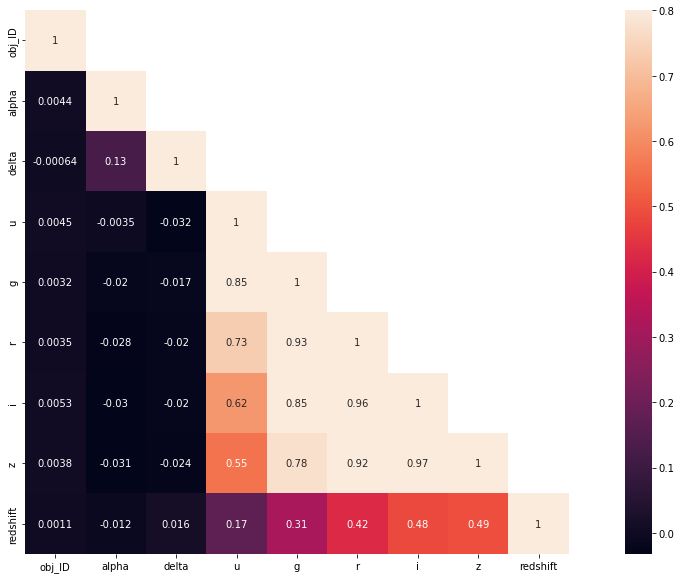

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

corrMatt = Xtrain.corr()#Définition de la matrice de corrélation
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False #cacher la partie inférieure de la matrice de correlation
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)#Affichage des correlations

In [193]:
#on enlève la variables corrélées : r
Xtrain.drop(['r'],axis=1, inplace=True)
Xtest.drop(['r'],axis=1, inplace=True)

In [194]:
Xtrain.columns #on vérifie qu'on a les bonnes colonnes

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'i', 'z', 'redshift', 'label'], dtype='object')

## Détection de valeurs aberrantes

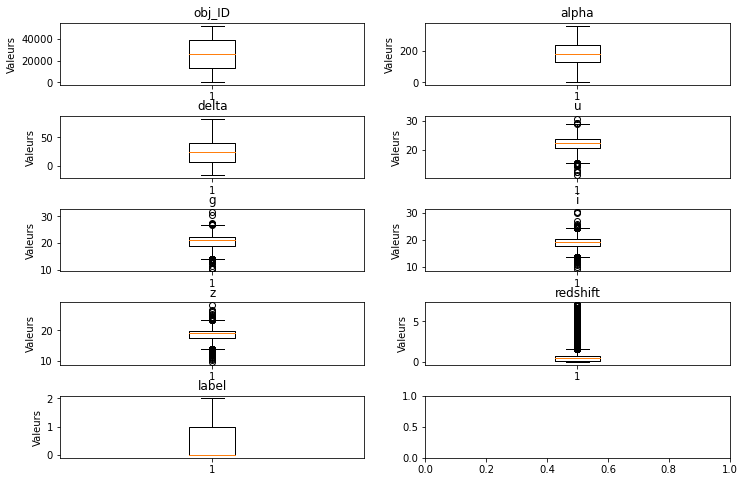

In [195]:
n_variables = len(Xtrain.columns)
n_cols = 2
n_rows = (n_variables + 1) // n_cols

# Création des sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  # Ajustement de l'espacement vertical entre les sous-graphiques

# Itération sur chaque variable et création d'un boxplot sur un sous-graphique différent
for i, variable in enumerate(Xtrain.columns):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    ax.boxplot(Xtrain[variable])
    ax.set_title(variable)
    ax.set_ylabel('Valeurs')

[Text(0.5, 0, 'label'), Text(0, 0.5, 'i'), Text(0.5, 1.0, 'Box Plot On i')]

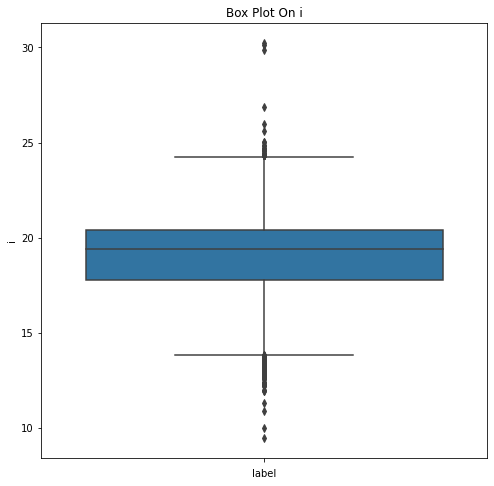

In [196]:
# On fait le boxplot pour la variable i 
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)

sn.boxplot(data=Xtrain,y="i",orient="v",ax=axes)

axes.set(xlabel='label', ylabel='i',title="Box Plot On i")





[Text(0.5, 0, 'label'),
 Text(0, 0.5, 'i'),
 Text(0.5, 1.0, 'Box Plot On i Across label')]

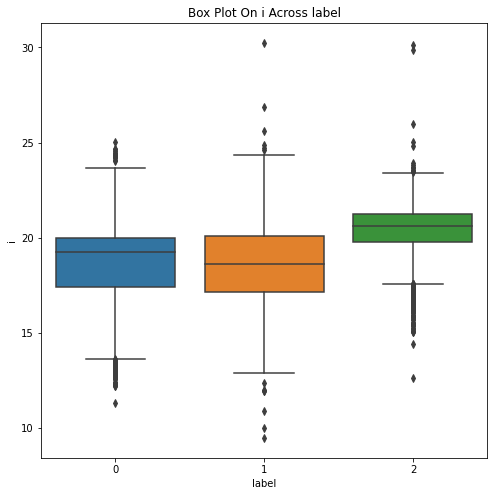

In [197]:
#Boxplot de i en fonction des labels
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=Xtrain,y="i",x="label",orient="v",ax=axes)
axes.set(xlabel='label', ylabel='i',title="Box Plot On i Across label")

In [199]:
#On regarde les variables qui sont hors de la boxplot
outlier=Xtrain[np.abs(Xtrain["i"] - Xtrain["i"].mean()) > (3 * Xtrain["i"].std())]

In [201]:
outlier

,obj_ID,alpha,delta,u,g,i,z,redshift,label
73,73,252.873026,19.416624,16.15454,14.30195,13.03615,12.71279,0.022582,0
1209,1209,71.052228,26.371972,17.03465,15.51468,11.97695,13.56818,0.000113,1
1814,1814,171.361535,57.721229,14.92536,13.56020,12.83076,12.64798,0.006129,0
2801,2801,139.461683,-0.278478,15.76585,14.28800,13.02648,12.64552,0.017477,0
2957,2957,256.688612,20.218541,25.15378,24.76277,25.60949,20.29618,-0.000157,1
...,...,...,...,...,...,...,...,...,...
49829,49829,50.241295,41.893850,17.13744,14.81121,13.07370,12.62593,0.014702,0
50085,50085,169.053816,20.310490,20.27785,19.92843,30.15460,18.29056,0.781847,2
51489,51489,119.206941,17.109716,18.46669,17.88514,24.87711,16.09237,-0.000093,1
51566,51566,211.250787,13.131893,15.78661,13.86731,12.67982,12.43503,0.017324,0


In [202]:
#On regarde les valeurs aberrantes par categorie
outlier['label'].value_counts()

0    116
1     32
2      6
Name: label, dtype: int64

In [203]:
#Par rapport au nombre total de valeurs par categories
Xtrain['label'].value_counts()

0    31900
1    11019
2     9376
Name: label, dtype: int64

### Séparation des données pour l'évaluation des modèles

In [14]:
#Suppression de la colonne 'obj_ID'
ID=Xtest['obj_ID']
Xtrain.drop(['obj_ID'],axis=1, inplace=True)
Xtest.drop(['obj_ID'],axis=1, inplace=True)

#Déplacement de la variable 'label' dans un autre data set
Ytrain=Xtrain['label']
Xtrain.drop(['label'],axis=1, inplace=True)

In [35]:
#Séparation des données: 25% de test et 75% d'entrainement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Xtrain,Ytrain, random_state=150)

Maintenant que nous avons séparé nos données, nous pouvons entraîner différents modèles de classification multi-classe.

## Modélisation

### K plus proches voisins

Nous avons d'abord entraîné une méthode de knn simple avec n=3 voisins. La première étape est la normalisation des données.


In [36]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
Xtrain_normed=pd.DataFrame(scaler.transform(X_train))
Xtest_normed=pd.DataFrame(scaler.transform(X_test))

In [37]:
#Entrainement du modèle simple
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xtrain_normed, y_train)


KNeighborsClassifier(n_neighbors=3)

Nous allons alors calculer le score f1 de ce modèle sur nos données test.

In [38]:
#Prédictions et performances
from sklearn.metrics import f1_score
res_knn_default=neigh.predict(Xtest_normed)
score_knn_defaut=f1_score(y_test, res_knn_default, average='weighted')
print(score_knn_defaut)#0.93

0.9313332378963213


### Selection des hyperparamètres

In [33]:
#Validation croisée
from sklearn.model_selection import cross_val_score
score = 'f1_weighted' #on définit le score à optimiser

In [26]:
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15],
             'metric':['euclidean','manhattan','minkowski']}#Définition des paramètres à optimiser

from sklearn import neighbors, metrics
from sklearn import model_selection

clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)
clf.fit(Xtrain_normed,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='f1_weighted')

In [33]:
clf.best_params_ #on affiche les pramètres retenus

{'metric': 'manhattan', 'n_neighbors': 5}

In [38]:
res_knn=clf.predict(Xtest_normed)#on fait les prédictions avec le meilleur modèle
print(f1_score(y_test,res_knn, average='weighted'))#Affichage des résultats

0.9377051037244456


In [21]:
#mise en forme et téléchargement des données
predictions=pd.DataFrame(predictions)

predictions.insert(loc=0, column='obj_ID', value=ID)#ajout de la colonne 'obj_ID'
predictions.columns=['obj_ID','label']
predictions.to_csv("res_knn_sansr_classif.csv", index=False)#téléchargement

La méthode des K plus proches voisins nous a donné un score de 94% après soumission sur Kaggle.

### Forêts Aléatoires

Nous allons maintenant entraîner un modèle de Forêts Aléatoires sur nos données d'entraînement. 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
#Entraînement d'un premier modèle par défault

rfModel = RandomForestClassifier(random_state=42)#Définition du modèle
rfModel.fit(X_train,y_train)#Entrainement sur les données
rf_pred=rfModel.predict(X_test)#Prédictions
rf_score=f1_score(y_test, rf_pred, average='weighted')#calcul du score
print(rf_score)#0.9771

0.9771583153088522


### Ajustement des paramètres

In [99]:
param_rf={
    'n_estimators':500,#nombre d'arbres de décision dans la forêt. 
    'criterion':'gini',# fonction de critère utilisée pour mesurer la qualité de la division
    'max_depth':40,#profondeur maximale de chaque arbre de décision.
    'min_samples_split':3,#nombre minimum d'échantillons requis pour qu'une division se produise
    'max_features':3,#nombre de caractéristiques à considérer lors de la recherche de la meilleure division
    'min_samples_leaf':1,#nombre minimum d'échantillons requis pour qu'un nœud soit une feuille.
    'random_state':42#seed
}


In [101]:
rfModel_best = RandomForestClassifier(**param_rf,n_jobs=-1)#modèle avec les meilleurs hyper paramètres
rfModel_best.fit(X_train,y_train)#entrainement sur nos données
rf_pred_best=rfModel_best.predict(X_test)#prediction
score=f1_score(y_test, rf_pred_best, average='weighted') #calcul du score
print(score)#0.9777

0.9777767284924215


### Validation croisée

In [173]:
from sklearn import model_selection

In [174]:
#Définition des paramètres à optimiser
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    

}

# Créer un objet GridSearchCV
grid_rf = model_selection.GridSearchCV(rfModel, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)

# Ajuste la recherche d'hyperparamètres sur les données d'entraînement
grid_rf.fit(X_train, y_train)

#meilleurs hyperparamètres trouvés
best_params = grid_rf.best_params_

# Utilisation le meilleur modèle pour faire des prédictions sur les données de test
rf_preds = grid_rf.predict(X_test)

# Affichage des meilleurs hyperparamètres et des performances du modèle
print("Best parameters:", best_params)
print("F1 Value For RandomForestClassifier: ", f1_score(y_test, rf_preds, average='weighted'))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
F1 Value For RandomForestClassifier:  0.9766014900381371


### Soumission d'un premier résultat

In [102]:
predictions_rf =rfModel_best.predict(Xtest)#prédictions sur les données test
predictions_rf=pd.DataFrame(predictions_rf)
predictions_rf.insert(loc=0, column='obj_ID', value=ID)#ajout de la colonne 'obj_ID'
predictions_rf.columns=['obj_ID','label']
predictions_rf.to_csv("res_rf_classif_final.csv", index=False)#téléchargement

### Extra trees

Nous allons donc entraîner ce modèle sur nos données.

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
#Entraînement d'un premier modèle par défault

etModel = ExtraTreesClassifier(random_state=42)
etModel.fit(X_train,y_train)
et_pred=etModel.predict(X_test)
score_et=f1_score(y_test, et_pred, average='weighted')
print(score_et)#0.9718

0.9718134095318226


Nous allons maintenant jouer avec les parametres pour obtenir le meilleur score possible avant de lancer la validation croisée.

In [93]:
param_et={
    'n_estimators':500,#nombre d'arbres de décision dans la forêt. 
    'criterion':'gini',# fonction de critère utilisée pour mesurer la qualité de la division
    'max_depth':None,#profondeur maximale de chaque arbre de décision.
    'min_samples_split':2,#nombre minimum d'échantillons requis pour qu'une division se produise
    'max_features':7,#nombre de caractéristiques à considérer lors de la recherche de la meilleure division
    'min_samples_leaf':1,#nombre minimum d'échantillons requis pour qu'un nœud soit une feuille.
    'random_state':42#seed
    
}

In [94]:
etModel_best = ExtraTreesClassifier(**param_et)#modèle avec les meilleurs hyper paramètres
etModel_best.fit(X_train,y_train)#entrainement sur nos données
et_pred_best=etModel_best.predict(X_test)#prédiction
score_et_best=f1_score(y_test, et_pred_best, average='weighted') #calcul du score
print(score_et_best)#0.9742

0.9742429893637785


Nous allons maintenant choisir les hyper paramètres par validation croisée.

In [162]:
#Evaluation des meilleurs hyper paramètres par validation croisée
from sklearn.model_selection import GridSearchCV
#Définition des paramètres à tester
et_params = {
    'n_estimators': [100, 300, 500],
    'min_samples_split': [2, 5, 10],
    'max_features':['auto',5,7]
}

# Créer un objet GridSearchCV
grid_et = GridSearchCV(etModel, et_params, cv=5, scoring='f1_weighted', n_jobs=-1)

# Ajuste la recherche d'hyperparamètres sur les données d'entraînement
grid_et.fit(X_train, y_train)

#meilleurs hyperparamètres trouvés
best_params = grid_et.best_params_

# Utilisation du meilleur modèle pour faire des prédictions sur les données de test
et_preds = grid_et.predict(X_test)

# Affichage des meilleurs hyperparamètres et des performances du modèle
print("Best parameters:", best_params)
print("F1 Value For ExtraTreesClassifier: ", f1_score(y_test, et_preds, average='weighted'))

Best parameters: {'max_features': 7, 'min_samples_split': 5, 'n_estimators': 300}
F1 Value For ExtraTreesClassifier:  0.9735506449443933


Le meilleur modèle de Extra Trees ne semble pas meilleur que Random Forest, mais il reste assez performant par rapport à Knn, on peut donc tenter une soumission avec ce modèle

In [163]:
#On fait une soumission avec les paramètres trouvés à la main
etModel_best.fit(Xtrain,Ytrain)
predictions_et= etModel_best.predict(Xtest)
predictions_et=pd.DataFrame(predictions_et)
predictions_et.insert(loc=0, column='obj_ID', value=ID)#ajout de la colonne 'obj_ID'
predictions_et.columns=['obj_ID','label']
predictions_et.to_csv("res_et_sans_r_classif_final.csv", index=False)#téléchargement

### Gradient Boosting

On utlise light gbm

In [103]:
pip install lightgbm #installation du package

Note: you may need to restart the kernel to use updated packages.


In [122]:
from lightgbm import LGBMClassifier 

In [158]:
#Définition du modèle
gb_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    boosting_type='gbdt',
    metric='multi_logloss',
    num_leaves=25,
    learning_rate=0.1,
    feature_fraction=0.9
)

In [159]:
#Entrainement sur nos données
gb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 39221, number of used features: 7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Start training from score -0.495501
[LightGBM] [Info] Start training from score -1.553680
[LightGBM] [Info] Start training from score -1.718883


LGBMClassifier(feature_fraction=0.9, metric='multi_logloss', num_class=3,
               num_leaves=25, objective='multiclass')

In [160]:
#Prédictions et calcul du score
y_pred_gb = gb_model.predict(X_test)
score_gb = f1_score(y_test, y_pred_gb, average='weighted')
print(f'f1_score: {score_gb}')#0.9777

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
f1_score: 0.9777791393176896


On cherche les hyperparamètres par validation croisée

In [164]:
gb_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    boosting_type='gbdt',
    metric='multi_logloss'
)
param_grid = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
}
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1)

# Effectuer la recherche d'hyperparamètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs paramètres pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluer le modèle final
gb_score = f1_score(y_test, y_pred, average='weighted')
print(f'f1_score: {gb_score}')



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 26147, number of used features: 7
[LightGBM] [Info] Start training from score -0.495530
[LightGBM] [Info] Start training from score -1.553727
[LightGBM] [Info] Start training from score -1.718728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 26147, number of used features: 7
[LightGBM] [Info] Start training from score -0.495468
[LightGBM] [Info] Start training from score -1.553727
[LightGBM] [Info] Start training from score -1.718942
[LightGBM] [Info] Auto-choosing col-wis

On décide alors de faire une soumission avec les paramètres trouvés à la main.

In [ ]:
gb_model.fit(Xtrain,Ytrain)
predictions_gb= gb_model.predict(Xtest)
predictions_gb=pd.DataFrame(predictions_gb)
predictions_gb.insert(loc=0, column='obj_ID', value=ID)#ajout de la colonne 'obj_ID'
predictions_gb.columns=['obj_ID','label']
predictions_gb.to_csv("res_gb_sans_r_classif_final.csv", index=False)#téléchargement

### Combinaison des 3 modèles

In [165]:
from scipy.stats import mode

In [168]:
predictions_et= etModel_best.predict(Xtest)
predictions_rf =rfModel_best.predict(Xtest)
gb_model.fit(Xtrain,Ytrain)
predictions_gb= gb_model.predict(Xtest)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 52295, number of used features: 7
[LightGBM] [Info] Start training from score -0.494295
[LightGBM] [Info] Start training from score -1.557280
[LightGBM] [Info] Start training from score -1.718748


In [169]:
# Fusionner les prédictions
merged_predictions = np.zeros_like(predictions_et)
for i in range(len(predictions_et)):#boucle sur chaque individu
        counts = np.bincount([predictions_rf[i], predictions_et[i], predictions_gb[i]])
        merged_predictions[i] = np.argmax(counts)#On choisit la classe majoritaire

In [170]:
merged_predictions=pd.DataFrame(merged_predictions)
merged_predictions.astype('int')
merged_predictions.insert(loc=0, column='obj_ID', value=ID)#ajout de la colonne 'obj_ID'
merged_predictions.columns=['obj_ID','label']
merged_predictions.to_csv("res_merged_sans_r_classif.csv", index=False)#téléchargement